In [126]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

In [127]:
data = pd.read_csv('international-airline-passengers.csv',skipfooter=5)
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


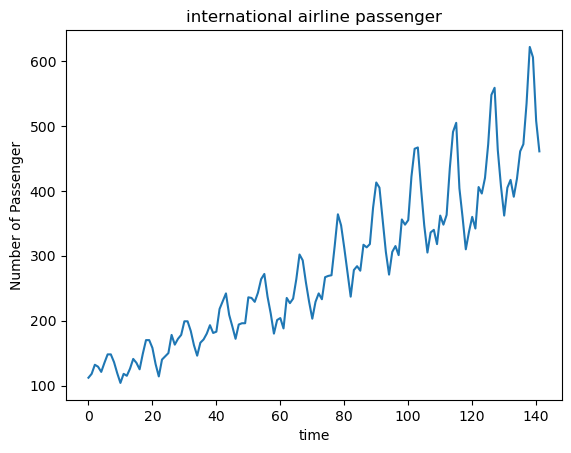

In [128]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

In [129]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(142, 1)

In [130]:
#scaling
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [131]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size : {}  -  test size : {} ".format(len(train),len(test)))

train size : 99  -  test size : 43 


In [132]:
time_step = 10
datax = []
datay = []
for i in range(len(train)-time_step-1):
    a = train[i:(i+time_step),0]
    datax.append(a)
    datay.append(train[i+time_step,0])
trainx = np.array(datax)
trainy = np.array(datay)

In [133]:
datax = []
datay = []
for i in range(len(test)-time_step-1):
    a = test[i:(i+time_step), 0]
    datax.append(a)
    datay.append(test[i + time_step, 0])
testx = np.array(datax)
testy = np.array(datay)  

In [134]:
trainx = np.reshape(trainx, (trainx.shape[0], 1 ,trainx.shape[1]))
testx = np.reshape(testx, (testx.shape[0], 1 ,testx.shape[1]))

In [135]:
#Create LSTM Model
model = Sequential()
model.add(LSTM(10, input_shape = (1, time_step)))
model.add(Dense(1))
model.compile(loss = "mean_squared_error" , optimizer = "adam")
model.fit(trainx, trainy,  epochs = 100, batch_size=1)

Epoch 1/100
88/88 [==============================] - 1s 897us/step - loss: 0.0280
Epoch 2/100
88/88 [==============================] - 0s 793us/step - loss: 0.0065
Epoch 3/100
88/88 [==============================] - 0s 805us/step - loss: 0.0053
Epoch 4/100
88/88 [==============================] - 0s 770us/step - loss: 0.0050
Epoch 5/100
88/88 [==============================] - 0s 770us/step - loss: 0.0043
Epoch 6/100
88/88 [==============================] - 0s 782us/step - loss: 0.0040
Epoch 7/100
88/88 [==============================] - 0s 770us/step - loss: 0.0037
Epoch 8/100
88/88 [==============================] - 0s 793us/step - loss: 0.0034
Epoch 9/100
88/88 [==============================] - 0s 782us/step - loss: 0.0032
Epoch 10/100
88/88 [==============================] - 0s 770us/step - loss: 0.0029
Epoch 11/100
88/88 [==============================] - 0s 770us/step - loss: 0.0028
Epoch 12/100
88/88 [==============================] - 0s 770us/step - loss: 0.0026
Epoch 13/100


88/88 [==============================] - 0s 770us/step - loss: 0.0012
Epoch 100/100
88/88 [==============================] - 0s 782us/step - loss: 0.0013


In [136]:
# Predictions and Visualising LSTM Model
trainPredict = model.predict(trainx)
testPredict = model.predict(testx)

trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([trainy])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([testy])


trainScore = math.sqrt(mean_squared_error(trainy[0] , trainPredict[:,0]))
print("Train Score : %.3f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testy[0] , testPredict[:,0]))
print("Test Score : %.3f RMSE" % (testScore))

1/1 [==============================] - 0s 12ms/step
Train Score : 17.994 RMSE
Test Score : 41.528 RMSE


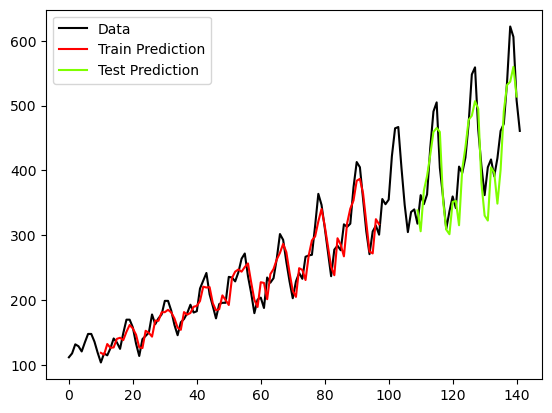

In [137]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(trainPredict)+time_step, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_step*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),color = "black",label = "Data")
plt.plot(trainPredictPlot,color = "red",label = "Train Prediction")
plt.plot(testPredictPlot,color = "chartreuse",label = "Test Prediction")
plt.legend()
plt.show()